<font size=5> Preprocessing

In [471]:
import pandas as pd
import operator

In [472]:
rent_data = pd.read_excel("https://www.dffh.vic.gov.au/sites/default/files/documents/202109/Moving%20annual%20rents%20by%20suburb%20-%20June%20quarter%202021.xlsx", sheet_name='All properties')
rent_data = rent_data.loc[2:173]
rent_data.drop(['All properties'],axis=1,inplace=True)
#rent_data.drop(rent_data.columns[1:143],axis=1,inplace=True)
rent_data = rent_data.loc[:,::2]
rent_data.rename(columns={'Unnamed: 1':'suburb'}, inplace = True)
rent_data




,suburb,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park-Middle Park-West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
5,Carlton-Parkville,260,260,260,260,260,260,265,270,270,...,439,440,430,420,404,400,400,395,350,340
6,CBD-St Kilda Rd,320,320,320,320,320,320,320,320,320,...,500,500,510,510,510,495,460,420,380,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,280,290,289,290,290,300,300,310,320,330
157,Warragul,130,135,135,135,135,135,140,145,150,...,340,350,350,348,350,350,360,380,375,380
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,310,320,330,330,340,340,340,350,350,360
159,Wodonga,145,145,150,150,150,150,150,150,150,...,310,320,320,325,330,330,330,330,340,350


In [473]:
data = pd.DataFrame()
sublist = []

for i in rent_data["suburb"]:
    index = rent_data[rent_data.suburb == i].index.tolist()[0]
    if operator.contains(i, "-"):
        j = i.split("-")
        for sub in j:
            sublist.append(sub)
            series = pd.DataFrame(rent_data[index-2:index-1])
            data = pd.concat([data, series])
    else:
        sublist.append(i)
        series = pd.DataFrame(rent_data[index-2:index-1])
        data = pd.concat([data, series])

data.insert(0, "suburb new", sublist)
data.drop(data.columns[1:2],axis=1,inplace=True)
data.to_csv("../data/curated/rent_data_finish.csv")
data

,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,Middle Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,280,290,289,290,290,300,300,310,320,330
157,Warragul,130,135,135,135,135,135,140,145,150,...,340,350,350,348,350,350,360,380,375,380
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,310,320,330,330,340,340,340,350,350,360
159,Wodonga,145,145,150,150,150,150,150,150,150,...,310,320,320,325,330,330,330,330,340,350


In [474]:
data = data.drop_duplicates(subset='suburb new', inplace=False)


In [475]:
data = data.drop([8])
data

,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,Unnamed: 155,Unnamed: 157,Unnamed: 159,Unnamed: 161,Unnamed: 163,Unnamed: 165,Unnamed: 167,Unnamed: 169,Unnamed: 171,Unnamed: 173
2,Albert Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,Middle Park,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,550,560,565,595,600,585,560,550,500,500
3,Armadale,200,200,205,210,215,220,225,230,235,...,480,480,480,485,500,500,500,495,450,440
4,Carlton North,260,260,265,270,270,275,280,280,290,...,580,577,580,580,585,590,590,590,580,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Traralgon,125,120,125,125,125,125,130,125,130,...,280,285,290,295,300,300,310,320,330,345
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,280,290,289,290,290,300,300,310,320,330
157,Warragul,130,135,135,135,135,135,140,145,150,...,340,350,350,348,350,350,360,380,375,380
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,310,320,330,330,340,340,340,350,350,360


In [476]:
count = 0
for i in data.columns.tolist():
    count += 1
    if count > 1:
        data[i]=pd.to_numeric(data[i])
    

In [477]:
year = 2000
list_col = []
count = 1
num = 0
for i in data.columns[1:87]:
    list_col.append(i)
    if count == 4:
        data[year+num] =  (data[list_col[0]] + data[list_col[1]] + data[list_col[2]] + data[list_col[3]])/4
        count = 1
        num += 1
        list_col = []
    else:
        count += 1
    

In [478]:
data[2021] = (data['Unnamed: 171'] + data['Unnamed: 173'])/2
data


,suburb new,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Albert Park,260,260,270,275,275,280,280,290,300,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,Middle Park,260,260,270,275,275,280,280,290,300,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,West St Kilda,260,260,270,275,275,280,280,290,300,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
3,Armadale,200,200,205,210,215,220,225,230,235,...,385.00,395.00,393.75,399.5,402.50,445.00,486.25,481.25,498.75,445.0
4,Carlton North,260,260,265,270,270,275,280,280,290,...,495.00,492.50,515.00,530.0,525.75,545.00,566.75,579.25,588.75,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Traralgon,125,120,125,125,125,125,130,125,130,...,250.00,256.25,263.75,270.0,270.00,276.25,278.75,287.50,307.50,337.5
156,Wanagaratta,125,125,130,130,130,130,130,135,135,...,221.25,235.00,247.50,250.0,260.00,266.25,274.25,287.25,300.00,325.0
157,Warragul,130,135,135,135,135,135,140,145,150,...,260.00,267.50,273.00,280.0,293.75,305.00,323.75,347.00,360.00,377.5
158,Warrnambool,130,135,135,135,140,140,140,145,145,...,282.50,280.00,280.00,285.0,288.75,292.25,300.00,322.50,342.50,355.0


In [479]:
data.drop(data.columns[1:87],axis=1,inplace=True)
data


,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Albert Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.50,389.75,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,Middle Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.50,389.75,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
2,West St Kilda,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.50,389.75,...,460.00,461.50,472.50,492.5,515.00,527.75,562.50,567.50,573.75,500.0
3,Armadale,203.75,222.50,231.25,237.50,238.75,243.25,261.25,295.00,331.25,...,385.00,395.00,393.75,399.5,402.50,445.00,486.25,481.25,498.75,445.0
4,Carlton North,263.75,276.25,290.00,290.00,298.75,301.25,322.75,345.00,388.75,...,495.00,492.50,515.00,530.0,525.75,545.00,566.75,579.25,588.75,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Traralgon,123.75,126.25,132.50,150.00,159.50,167.50,175.00,186.25,205.75,...,250.00,256.25,263.75,270.0,270.00,276.25,278.75,287.50,307.50,337.5
156,Wanagaratta,127.50,131.25,135.00,142.50,153.75,162.50,172.50,181.25,187.50,...,221.25,235.00,247.50,250.0,260.00,266.25,274.25,287.25,300.00,325.0
157,Warragul,133.75,138.75,152.50,163.75,173.75,182.50,187.50,193.25,202.75,...,260.00,267.50,273.00,280.0,293.75,305.00,323.75,347.00,360.00,377.5
158,Warrnambool,133.75,141.25,150.00,163.75,178.75,193.75,203.25,212.50,222.50,...,282.50,280.00,280.00,285.0,288.75,292.25,300.00,322.50,342.50,355.0


In [480]:
data_sum = (data[[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]].sum())/215
data.loc[data.index.max()+1] = data_sum
data.loc[data.index.max(),'suburb new'] = 'total'
data

,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Albert Park,266.250000,281.250000,300.000000,293.750000,300.000000,302.500000,317.000000,362.500000,389.750000,...,460.000000,461.500000,472.500000,492.500000,515.00000,527.750000,562.50000,567.500000,573.750000,500.000000
2,Middle Park,266.250000,281.250000,300.000000,293.750000,300.000000,302.500000,317.000000,362.500000,389.750000,...,460.000000,461.500000,472.500000,492.500000,515.00000,527.750000,562.50000,567.500000,573.750000,500.000000
2,West St Kilda,266.250000,281.250000,300.000000,293.750000,300.000000,302.500000,317.000000,362.500000,389.750000,...,460.000000,461.500000,472.500000,492.500000,515.00000,527.750000,562.50000,567.500000,573.750000,500.000000
3,Armadale,203.750000,222.500000,231.250000,237.500000,238.750000,243.250000,261.250000,295.000000,331.250000,...,385.000000,395.000000,393.750000,399.500000,402.50000,445.000000,486.25000,481.250000,498.750000,445.000000
4,Carlton North,263.750000,276.250000,290.000000,290.000000,298.750000,301.250000,322.750000,345.000000,388.750000,...,495.000000,492.500000,515.000000,530.000000,525.75000,545.000000,566.75000,579.250000,588.750000,580.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Wanagaratta,127.500000,131.250000,135.000000,142.500000,153.750000,162.500000,172.500000,181.250000,187.500000,...,221.250000,235.000000,247.500000,250.000000,260.00000,266.250000,274.25000,287.250000,300.000000,325.000000
157,Warragul,133.750000,138.750000,152.500000,163.750000,173.750000,182.500000,187.500000,193.250000,202.750000,...,260.000000,267.500000,273.000000,280.000000,293.75000,305.000000,323.75000,347.000000,360.000000,377.500000
158,Warrnambool,133.750000,141.250000,150.000000,163.750000,178.750000,193.750000,203.250000,212.500000,222.500000,...,282.500000,280.000000,280.000000,285.000000,288.75000,292.250000,300.00000,322.500000,342.500000,355.000000
159,Wodonga,147.500000,150.000000,155.000000,167.500000,181.250000,192.500000,210.000000,218.750000,227.500000,...,261.250000,270.000000,280.000000,287.500000,290.00000,298.750000,302.50000,318.750000,330.000000,345.000000


In [512]:
data_list = data.iloc[215].values.tolist()
data_list[1:23]

[183.29418604651164,
 192.69883720930233,
 202.3546511627907,
 208.8267441860465,
 215.84767441860464,
 222.91627906976746,
 233.6174418604651,
 254.54302325581395,
 285.61744186046514,
 309.2872093023256,
 325.22906976744184,
 340.7453488372093,
 349.31162790697675,
 353.153488372093,
 359.3837209302326,
 367.38255813953486,
 376.82906976744187,
 390.5779069767442,
 406.32906976744187,
 418.52558139534887,
 421.6662790697674,
 413.846511627907]

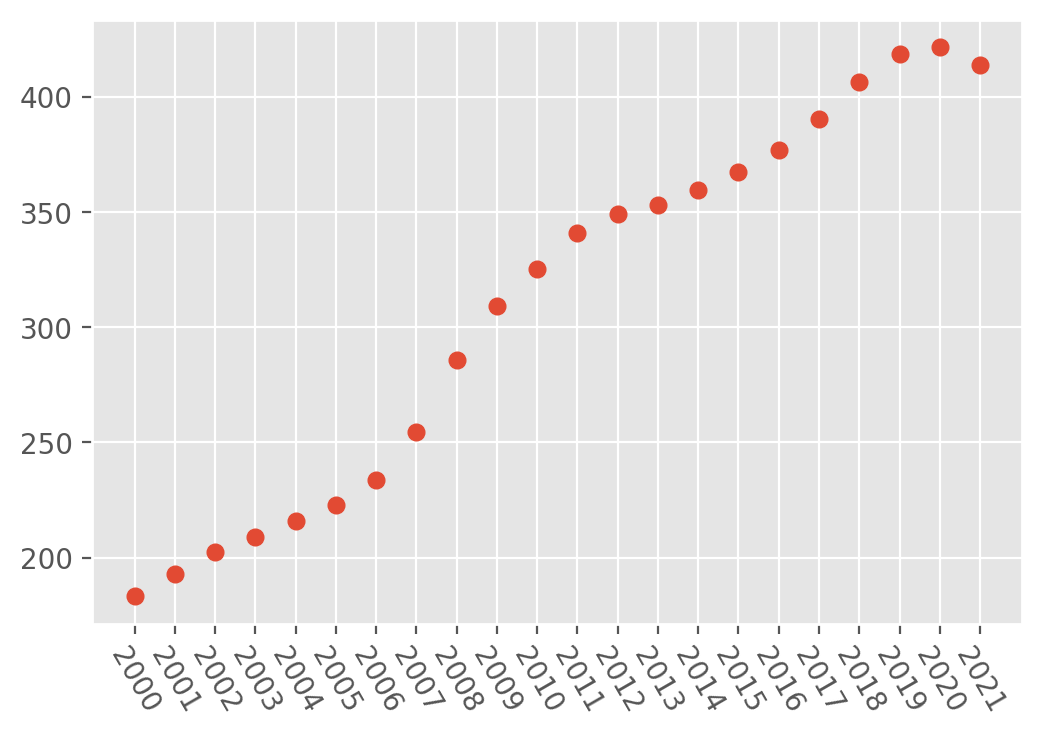

In [518]:
import matplotlib.pyplot as plt
Y=(data_list[1:23])
X = ['2000','2001','2002','2003','2004','2005','2006','2007',\
    '2008','2009','2010','2011','2012','2013','2014','2015',\
    '2016','2017','2018','2019','2020','2021']
plt.scatter(X, Y)
plt.xticks(rotation=300)
plt.show()


<font size = 5> Modelling

<font size=5>past rent rate

In [194]:
count=0
index_list = []
for index in data:
    count+=1
    index_list.append(index)
    if count >=3:
        data[str(index)+'_rate'] = (data[str(index)] - data[str(index_list[count-2])]) / data[str(index_list[count-2])] *100

